<a href="https://colab.research.google.com/github/hgabrali/Unsupervised-Vehicle-Profile-Classification-and-Feature-Space-Optimization/blob/main/Unsupervised_Vehicle_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗💨 Unsupervised Vehicle Profile Classification and Feature Space Optimization

---

## 💡 1. Project Overview

This project focuses on solving a **vehicle classification problem** for **"Prospect Auto,"** a chain of car repair shops. The company seeks an automated solution to swiftly and accurately differentiate vehicle types for streamlined internal logistics, such as parts inventory and service bay allocation.

The core objective is to develop a robust predictive model capable of differentiating between **three distinct vehicle classes**—a double-decker bus, a Chevrolet van, and a third vehicle (either a Saab 9000 or Opel Manta)—based solely on geometric features extracted from their silhouette profiles.

Unlike previous attempts leveraging supervised learning, this iteration critically explores the efficacy of **unsupervised clustering techniques** for classification. A key focus is the **optimization of the feature space** through **Principal Component Analysis (PCA)** to assess dimensionality reduction's impact on model performance and efficiency.

#### Previous Project: [Vehicle-Silhouette-Classification-for-Prospect-Auto](https://github.com/hgabrali/Vehicle-Silhouette-Classification-for-Prospect-Auto)

#### [Previous Project Colab:Vehicle Silhouette Classification for Prospect Auto](https://github.com/hgabrali/Vehicle-Silhouette-Classification-for-Prospect-Auto/blob/main/MS_DATA_Vehicle_Silhouette_Classification_for_Prospect_Auto_Hande_GK.ipynb)
---

## 📊 2. Dataset Description

The analysis utilizes the established **Cars Silhouette Dataset**. This dataset comprises **18 highly specific, numeric, and continuous features** derived from the silhouettes of vehicles captured at various angles.

| Feature Type | Detail |
| :--- | :--- |
| **Input Features (18)** | Geometric parameters, including aspect ratios, boundary box measurements, scale factors, and moments. All features are numeric. |
| **Target Classes (3)** | Bus (double-decker), Van (Chevrolet), and Car (Saab 9000 / Opel Manta). |

## ⚙️ 3. Project Workflow and Methodology

The project adheres to a rigorous data science methodology, with a specialized focus on unsupervised techniques and dimensionality reduction.

### 🧹 3.1 Data Preparation

* **Library Importation:** Importation of necessary Python libraries (`pandas`, `numpy`, `sklearn`, etc.).
* **Data Loading:** Reading the dataset from the provided source.
* **Data Preprocessing:**
    * **Normalization & Standardization:** Applying scaling techniques to ensure all geometric features contribute equally to the distance metrics used in clustering algorithms.
    * **Train/Test Split:** Partitioning the dataset into training and testing subsets to validate the final model's generalization capabilities, even for clustering-based validation.

In [19]:
# Installation (Run this in a Colab cell once)
!pip install ucimlrepo

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from ucimlrepo import fetch_ucirepo
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:

import gdown  # Import the gdown library

# --- 1. Data Loading from Google Drive URL ---

# The File ID from your share link:
# https://drive.google.com/file/d/1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3/view?usp=drive_link
file_id = "1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3"

# Define the local filename to save the downloaded file as
output_filename = "vehicle.csv"

# Download the file from Google Drive using its ID
# This will download the file to the Colab environment's local storage
try:
    gdown.download(id=file_id, output=output_filename, quiet=False)
    print(f"\nSuccessfully downloaded file: {output_filename}")
except Exception as e:
    print(f"Error downloading the file: {e}")
    print("Please ensure the file's sharing permissions are set to 'Anyone with the link can view'.")
    raise

# --- 2. Load Data into Pandas ---

# Load the dataset from the locally downloaded CSV file
df = pd.read_csv(output_filename)
print(f"Successfully loaded {output_filename} into DataFrame.")


Downloading...
From: https://drive.google.com/uc?id=1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3
To: /content/vehicle.csv
100%|██████████| 55.8k/55.8k [00:00<00:00, 21.4MB/s]


Successfully downloaded file: vehicle.csv
Successfully loaded vehicle.csv into DataFrame.


In [3]:
df_veh = df.copy()

## 3.1 🔍 Exploratory Data Analysis (EDA)

The purpose of this phase is to gain a foundational understanding of the data's structure, identify potential issues (like missing values or imbalance), and visualize relationships before proceeding to modeling.

###  Structural and Statistical Check

We first check the data types, look for missing values, and review the descriptive statistics.


In [4]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df_veh.nunique()

,0
compactness,44
circularity,27
distance_circularity,63
radius_ratio,134
pr.axis_aspect_ratio,37
max.length_aspect_ratio,21
scatter_ratio,131
elongatedness,35
pr.axis_rectangularity,13
max.length_rectangularity,66


In [6]:
df_veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [7]:
df_veh.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
df_veh.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


DataFrame 'df_veh' successfully loaded and prepared.


/tmp/ipython-input-4246915296.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_veh, x='class', palette=DARK_PURPLE_PALETTE)


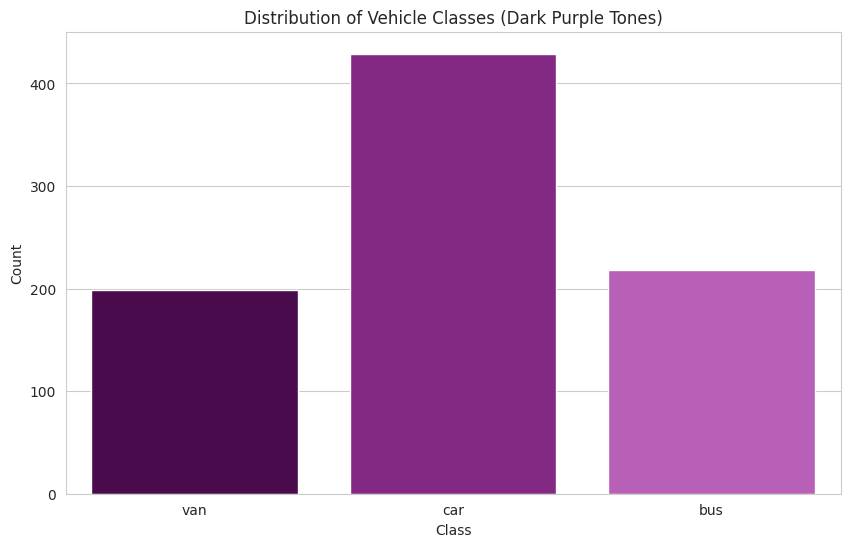

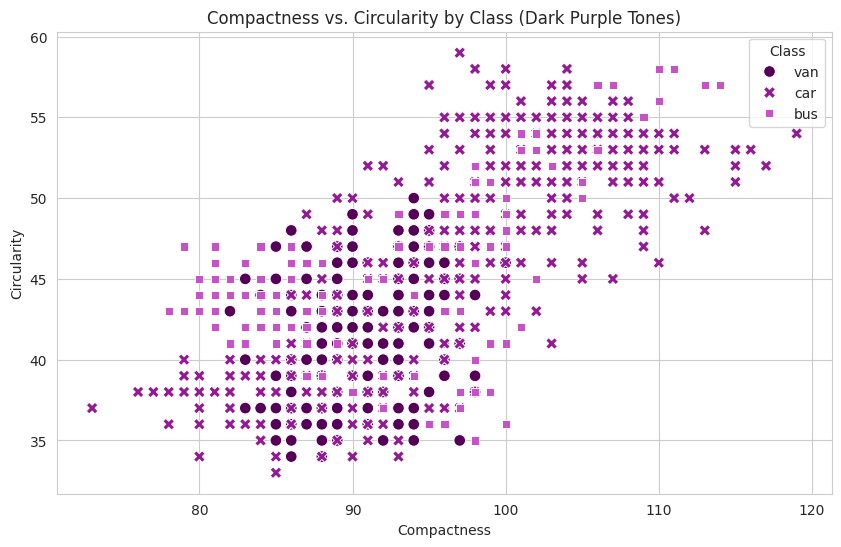

/tmp/ipython-input-4246915296.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_veh, x='class', y='radius_ratio', palette=DARK_PURPLE_PALETTE)


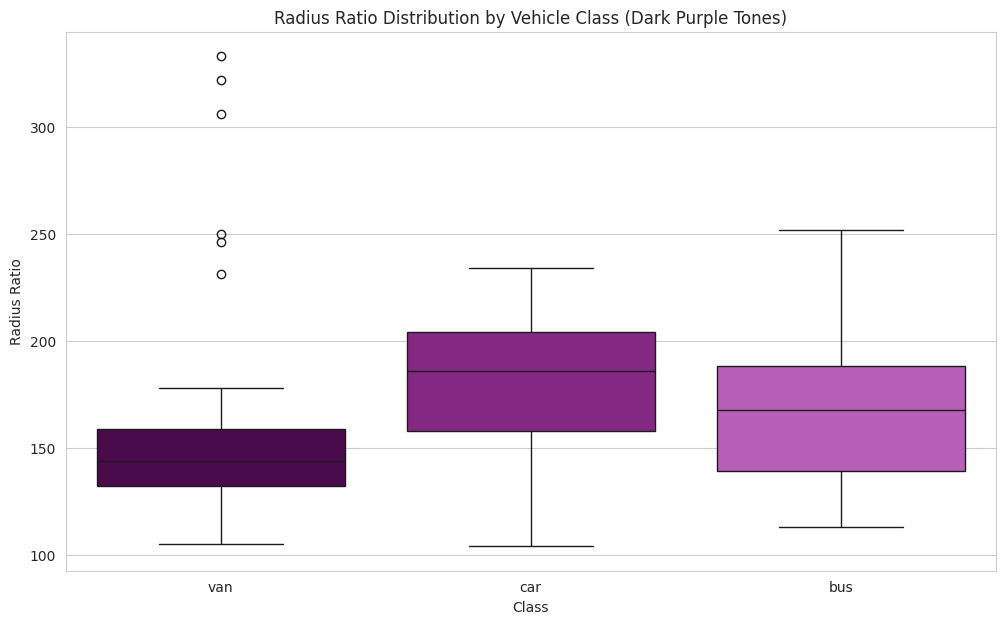

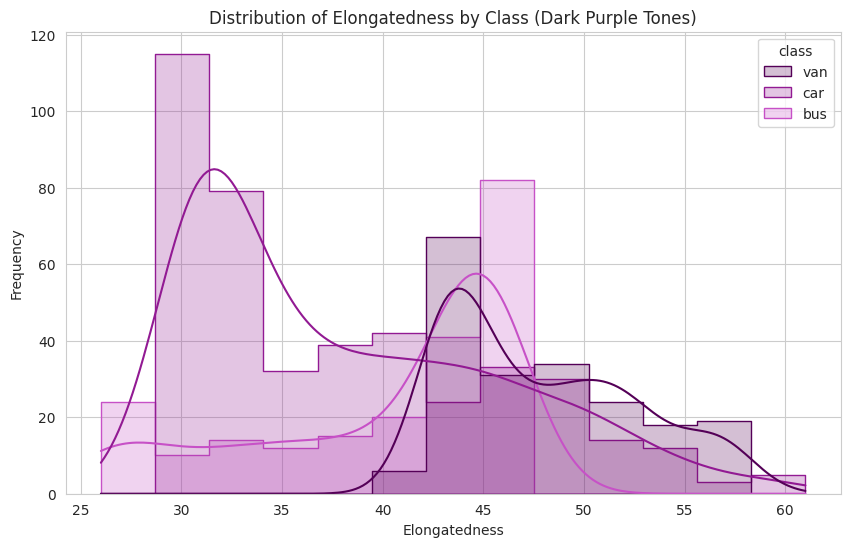

In [9]:
# Set a clean plotting style for all charts
sns.set_style("whitegrid")

# Define a custom color palette with three distinct dark purple tones for the three classes
# These colors ensure good contrast and adhere to the "dark purple tones" request.
DARK_PURPLE_PALETTE = ['#540057', '#921A93', '#C751C7']

# --- 1. Data Loading and Column Renaming ---
try:
    # Load the dataset
    df = pd.read_csv("vehicle.csv")

    # Define descriptive column names (based on standard Vehicle dataset features)
    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]

    # Assign the new, descriptive column names
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please ensure the file is uploaded to the Colab session.")
    # Stop execution if file isn't found
    raise

# --- 2. Exploratory Visualization (Dark Purple Theme) ---

# Ensure the DataFrame was loaded before attempting to plot
if 'df_veh' in locals() and isinstance(df_veh, pd.DataFrame):

    # Graph 1: Class Distribution (Countplot)
    plt.figure(figsize=(10, 6))
    # COLOR CHANGE: Using the custom dark purple palette
    sns.countplot(data=df_veh, x='class', palette=DARK_PURPLE_PALETTE)
    plt.title('Distribution of Vehicle Classes (Dark Purple Tones)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

    # Graph 2: Scatter Plot for two features
    plt.figure(figsize=(10, 6))
    # COLOR CHANGE: Using the custom dark purple palette for hue
    sns.scatterplot(data=df_veh, x='compactness', y='circularity', hue='class', style='class',
                    palette=DARK_PURPLE_PALETTE, s=70)
    plt.title('Compactness vs. Circularity by Class (Dark Purple Tones)')
    plt.xlabel('Compactness')
    plt.ylabel('Circularity')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

    # Graph 3: Boxplot for a feature across classes
    plt.figure(figsize=(12, 7))
    # COLOR CHANGE: Using the custom dark purple palette for boxplot comparison
    sns.boxplot(data=df_veh, x='class', y='radius_ratio', palette=DARK_PURPLE_PALETTE)
    plt.title('Radius Ratio Distribution by Vehicle Class (Dark Purple Tones)')
    plt.xlabel('Class')
    plt.ylabel('Radius Ratio')
    plt.show()

    # Graph 4: Histogram / KDE Plot for a feature
    plt.figure(figsize=(10, 6))
    # COLOR CHANGE: Using the custom dark purple palette for histogram/KDE hue
    sns.histplot(data=df_veh, x='elongatedness', hue='class', kde=True, element="step",
                 palette=DARK_PURPLE_PALETTE)
    plt.title('Distribution of Elongatedness by Class (Dark Purple Tones)')
    plt.xlabel('Elongatedness')
    plt.ylabel('Frequency')
    plt.show()

else:
    print("DataFrame 'df_veh' is not loaded. Cannot generate plots.")

In [10]:
# Exploring DataFrame Values
# DataFrame Indexing and Slicing (.loc[] and .iloc[])

# A. .loc[]:

print("--- .loc[]: Rows 0-4, specific columns 'compactness' & 'circularity' ---")
print(df_veh.loc[0:4, ['compactness', 'circularity']])

print("\n--- .loc[]: Conditional filtering (max.length_aspect_ratio > 10) ---")
print(df_veh.loc[df_veh['max.length_aspect_ratio'] > 10].head())

# B. .iloc[]: Position-based selection

print("\n--- .iloc[]: Rows 9-14, Columns 2-4 ---")
print(df_veh.iloc[9:15, 2:5])

--- .loc[]: Rows 0-4, specific columns 'compactness' & 'circularity' ---
   compactness  circularity
0           95         48.0
1           91         41.0
2          104         50.0
3           93         41.0
4           85         44.0

--- .loc[]: Conditional filtering (max.length_aspect_ratio > 10) ---
    compactness  circularity  distance_circularity  radius_ratio  \
4            85         44.0                  70.0         205.0   
9            93         44.0                  98.0           NaN   
24           99         53.0                 105.0         219.0   
27          107         54.0                  98.0         203.0   
30           89         43.0                  85.0         160.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                  103.0                       52          149.0   
9                   62.0                       11          183.0   
24                  66.0                       11          204.0   
27      

In [11]:
# Sorting Data


print("--- Sort by 'compactness' (Ascending, default) ---")
print(df_veh.sort_values(by='compactness').head())

print("\n--- Sort by 'radius_ratio' (Descending) ---")
print(df_veh.sort_values(by='radius_ratio', ascending=False).head())

print("\n--- Multi-column sort: 'class' (Asc) and 'compactness' (Desc) ---")
print(df_veh.sort_values(by=['class', 'compactness'], ascending=[True, False]).head())

--- Sort by 'compactness' (Ascending, default) ---
     compactness  circularity  distance_circularity  radius_ratio  \
73            73         37.0                  53.0         111.0   
515           76         38.0                  58.0         125.0   
112           77         38.0                  75.0         144.0   
61            77         38.0                  63.0         135.0   
466           78         43.0                  70.0         147.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
73                   54.0                        6          126.0   
515                  58.0                        5          133.0   
112                  59.0                        6          147.0   
61                   59.0                        5          130.0   
466                  65.0                        8          147.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
73            55.0                    18.0    

# 📉Univariate Analysis (Single Variable)

## Histograms


DataFrame 'df_veh' successfully loaded and prepared.
Generating histograms for numerical features...
Histograms plot saved to 'feature_histograms_purple.png'


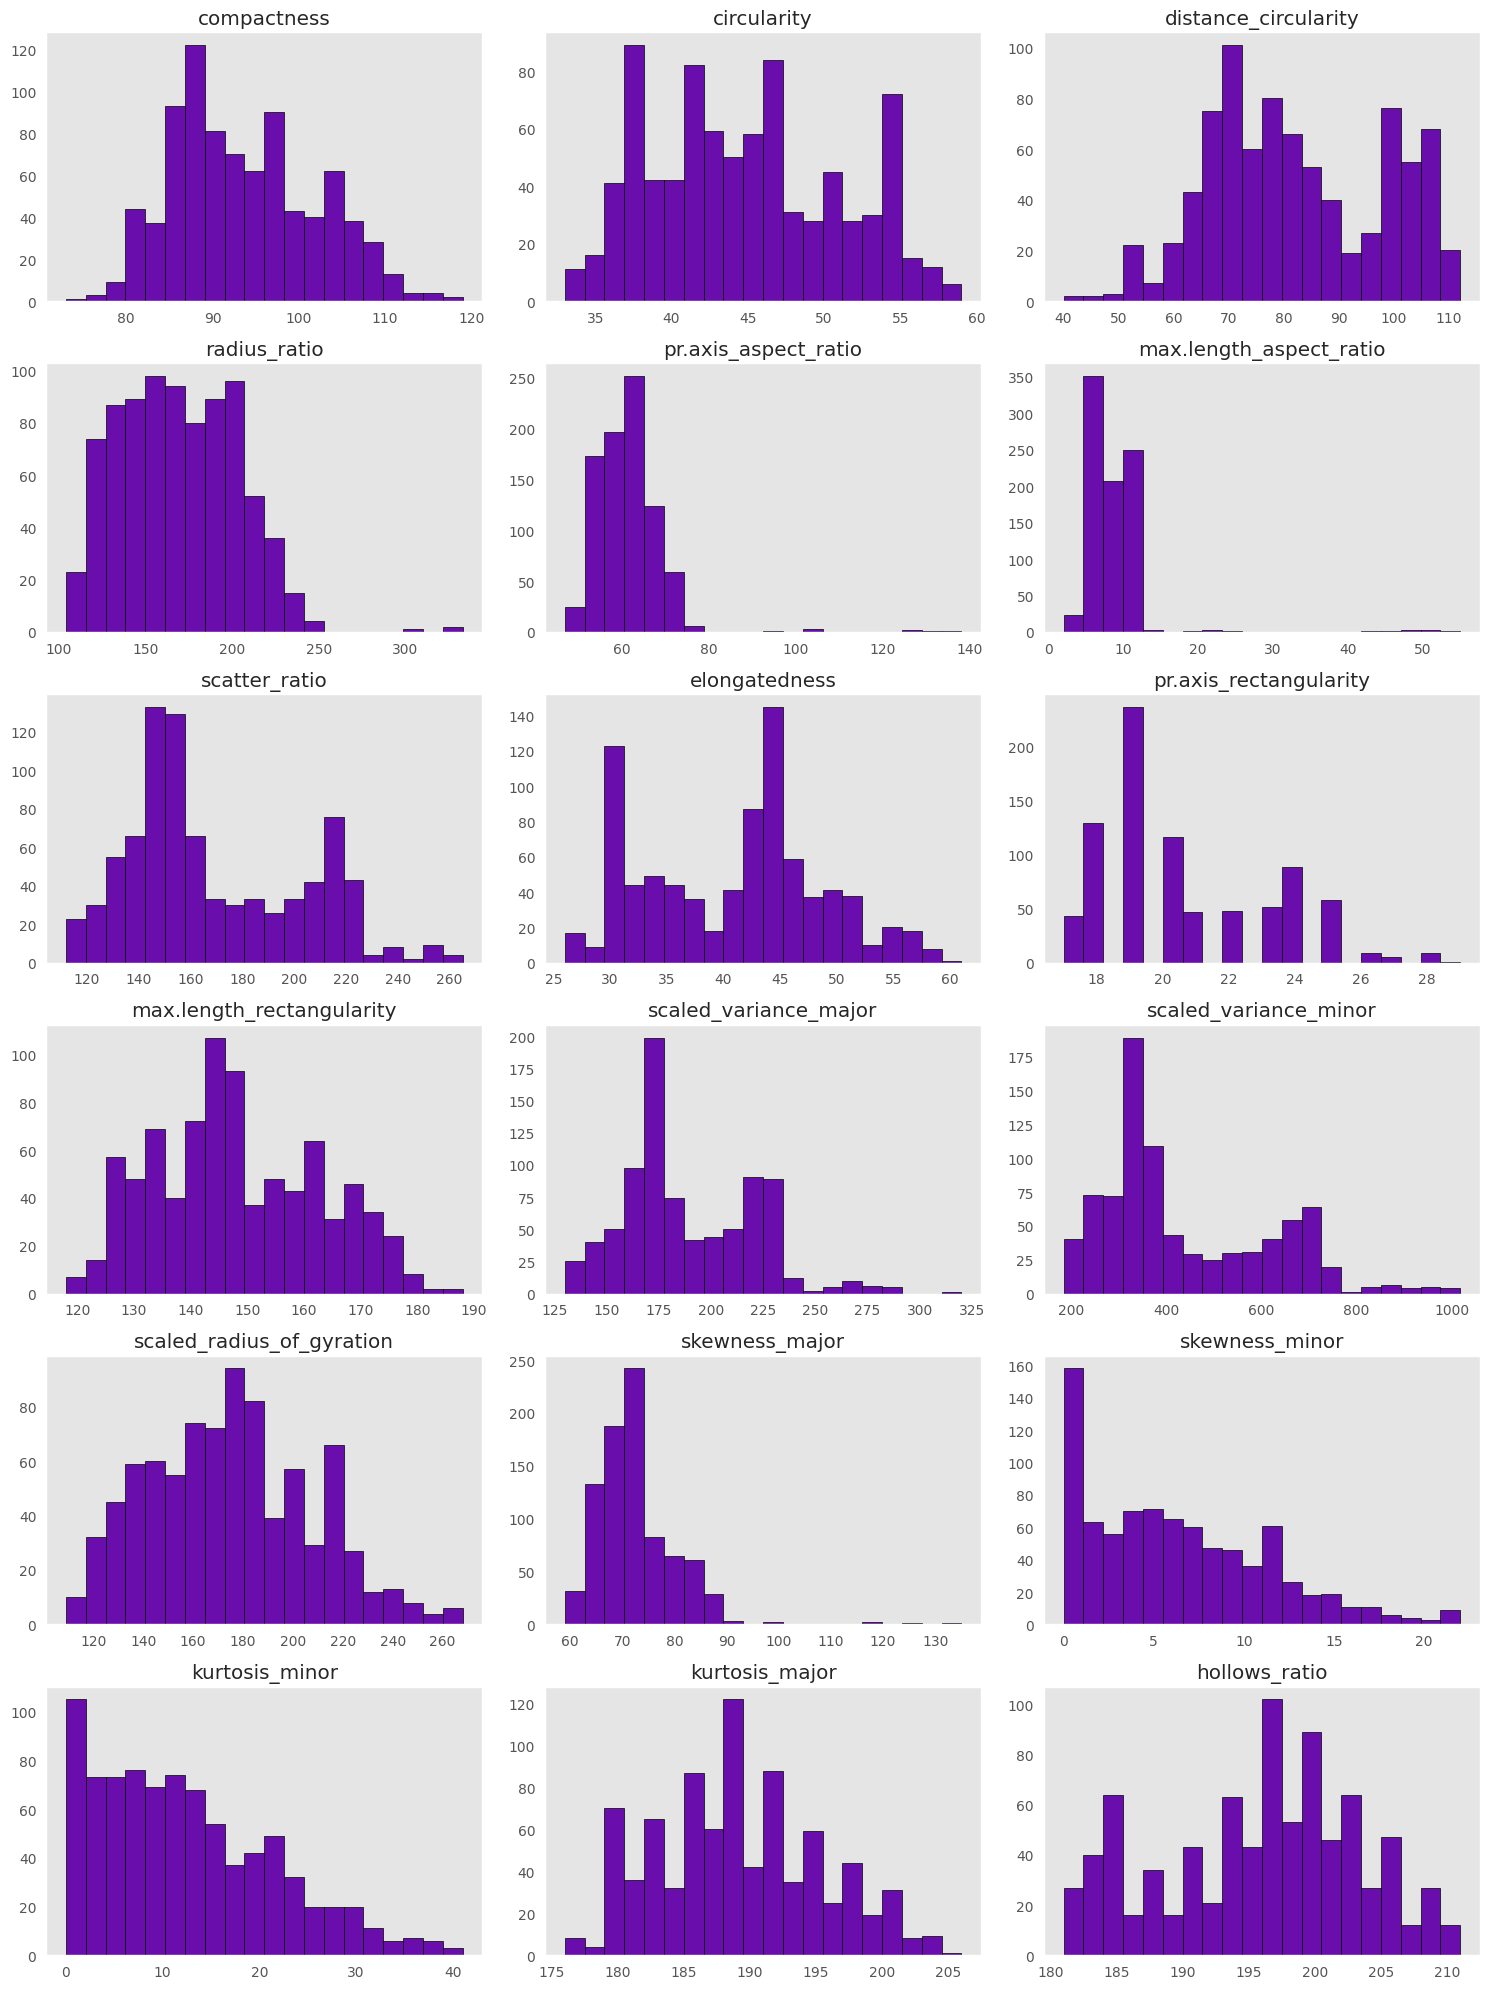

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings that might clutter the output
warnings.filterwarnings('ignore')

# Set a professional plotting style (e.g., 'ggplot')
plt.style.use('ggplot')

# Define the deep purple color for the histograms
HISTOGRAM_COLOR = '#6A0DAD' # Deep Purple

# --- 1. Data Loading and Column Renaming ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please ensure the file is in the correct path.")
    raise


# --- 2. Generate Histograms ---

print("Generating histograms for numerical features...")

# Select all numerical features by dropping the categorical 'class' column
numerical_features = df_veh.drop('class', axis=1)

# Create a grid of histograms for all numerical features
# COLOR CHANGE: The 'color' parameter is set to the deep purple hex code.
fig = numerical_features.hist(figsize=(15, 20), bins=20, layout=(6, 3), grid=False,
                              color=HISTOGRAM_COLOR,
                              edgecolor='black')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Save the resulting plot to a file
plt.savefig('feature_histograms_purple.png')

print("Histograms plot saved to 'feature_histograms_purple.png'")

## Box Plots

DataFrame 'df_veh' successfully loaded and prepared.
Generating box plots for numerical features by class...
Box plots saved to 'feature_boxplots_by_class_dark_purple.png'


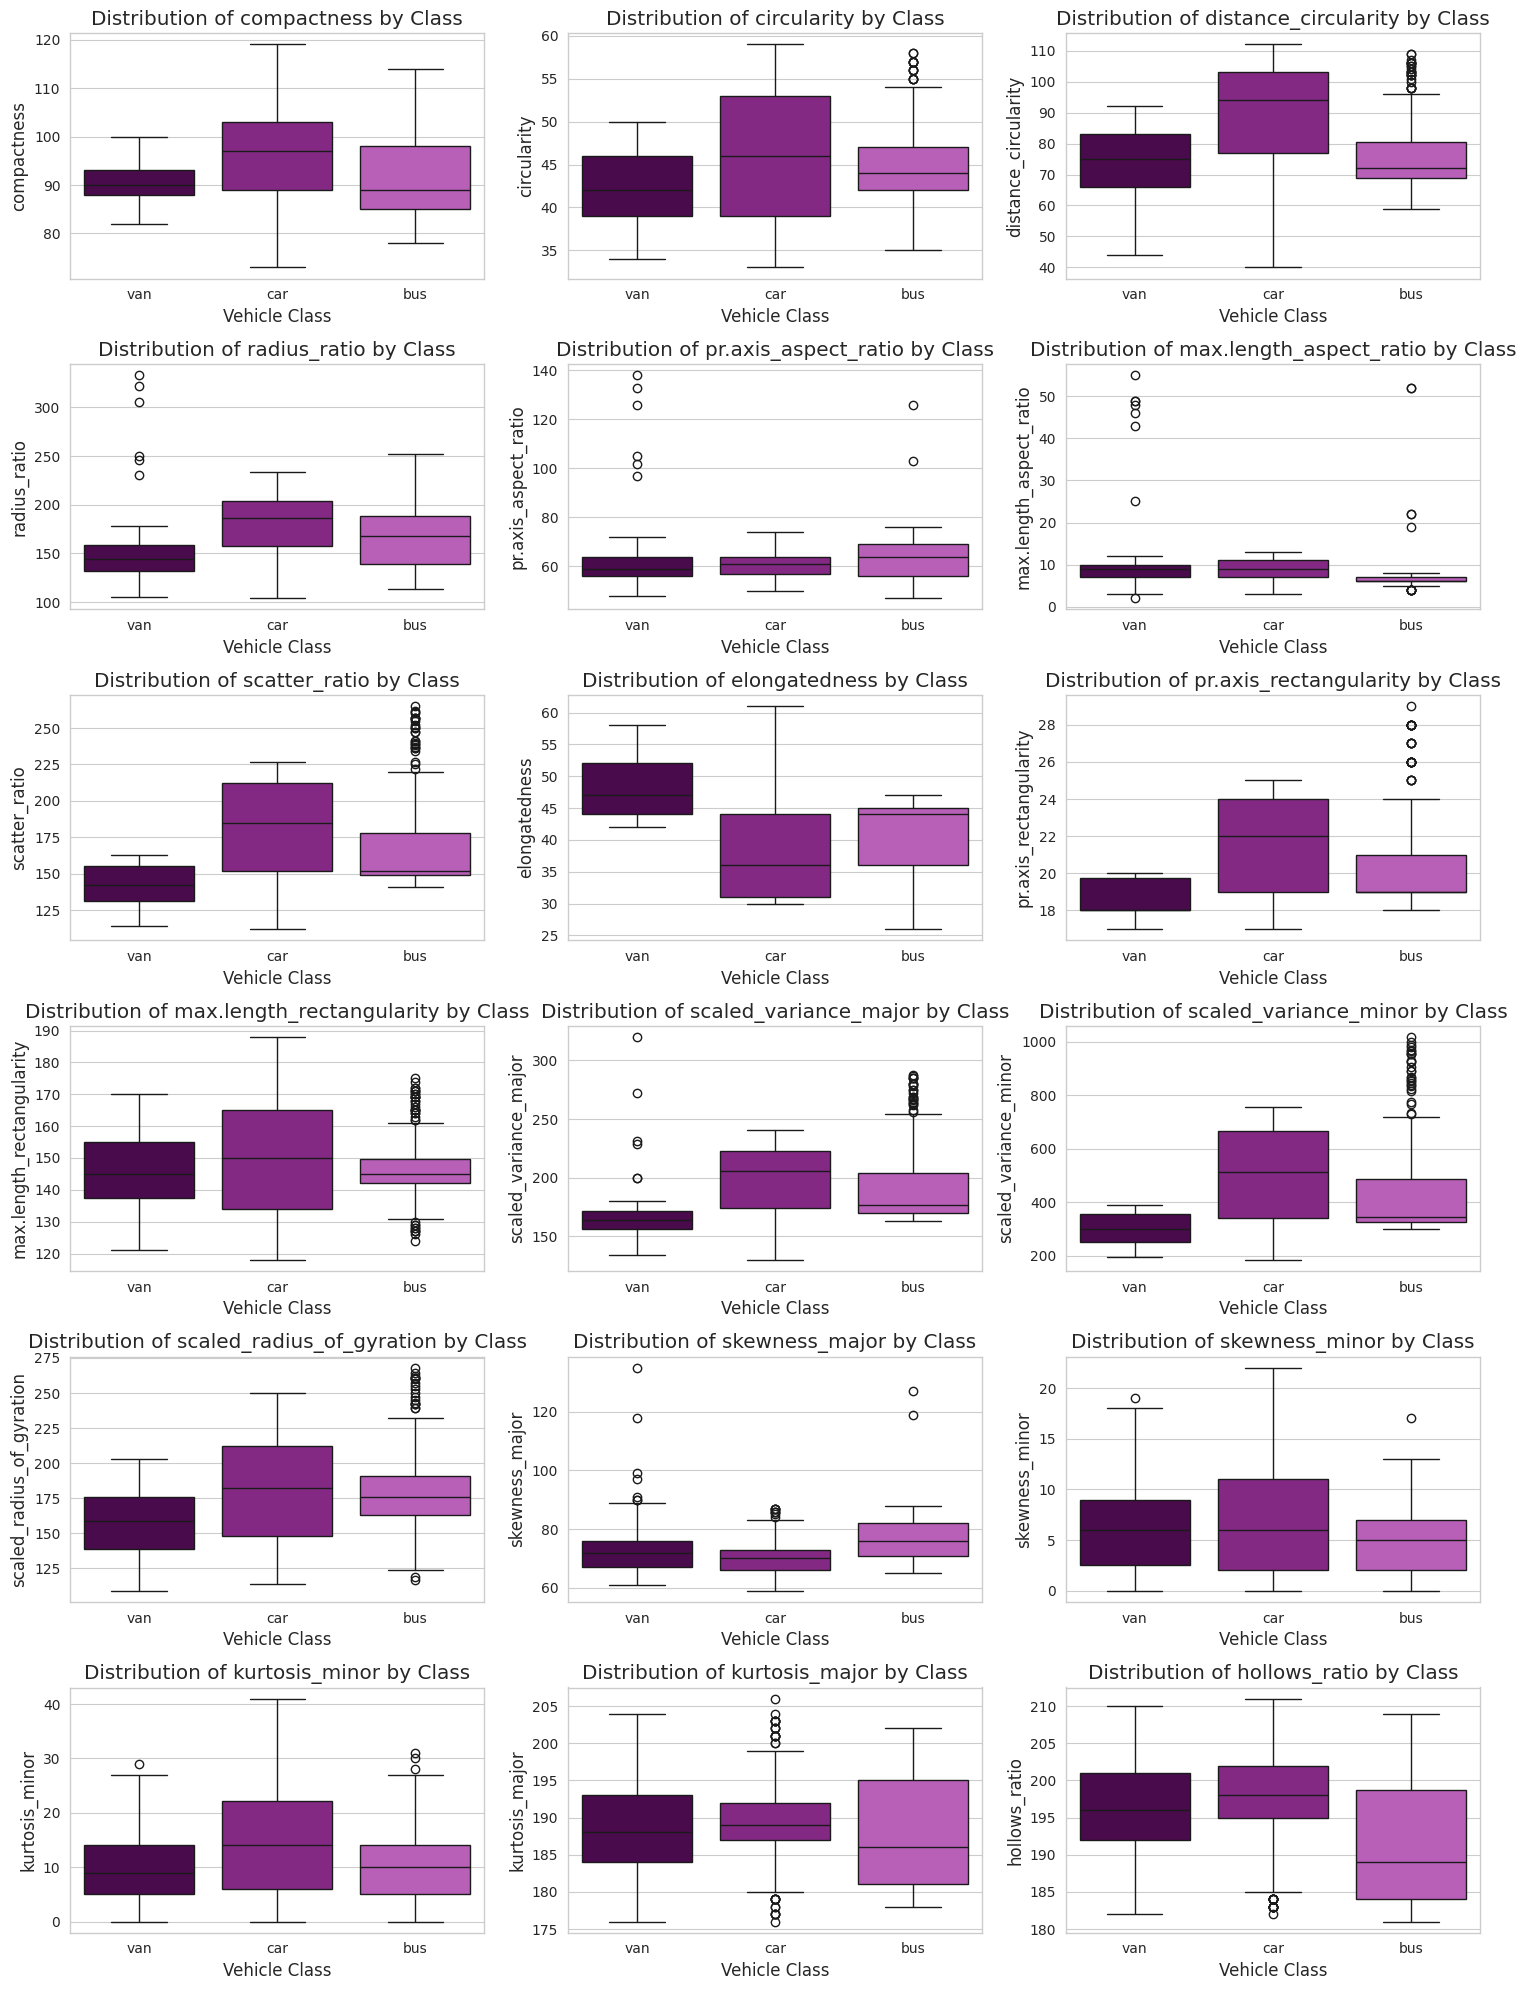

In [13]:
# Set the seaborn style for a clean background
sns.set_style("whitegrid")

# Define a custom color palette with three distinct dark purple/indigo tones for the three classes
DARK_PURPLE_PALETTE = ['#540057', '#921A93', '#C751C7']

# --- 1. Data Loading and Column Renaming ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please upload the file again.")
    raise

# --- 2. Box Plots Generation (Bivariate) ---

print("Generating box plots for numerical features by class...")

# Get feature columns (all columns except 'class')
numerical_features = df_veh.columns.drop('class')

# Create a figure and a set of subplots (6 rows, 3 columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot
for i, col in enumerate(numerical_features):
    sns.boxplot(
        x='class',              # Group by 'class'
        y=col,                  # The numerical feature to plot
        data=df_veh,            # The DataFrame
        ax=axes[i],             # Assign to the i-th subplot
        # COLOR CHANGE: Using the custom dark purple/indigo palette
        palette=DARK_PURPLE_PALETTE
    )
    # Set a clear title for each subplot
    axes[i].set_title(f'Distribution of {col} by Class')
    axes[i].set_xlabel('Vehicle Class')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('feature_boxplots_by_class_dark_purple.png')

print("Box plots saved to 'feature_boxplots_by_class_dark_purple.png'")

## Density Plots

DataFrame 'df_veh' successfully loaded and prepared.
Generating density plots for numerical features...
Density plots saved to 'feature_density_plots_purple.png'


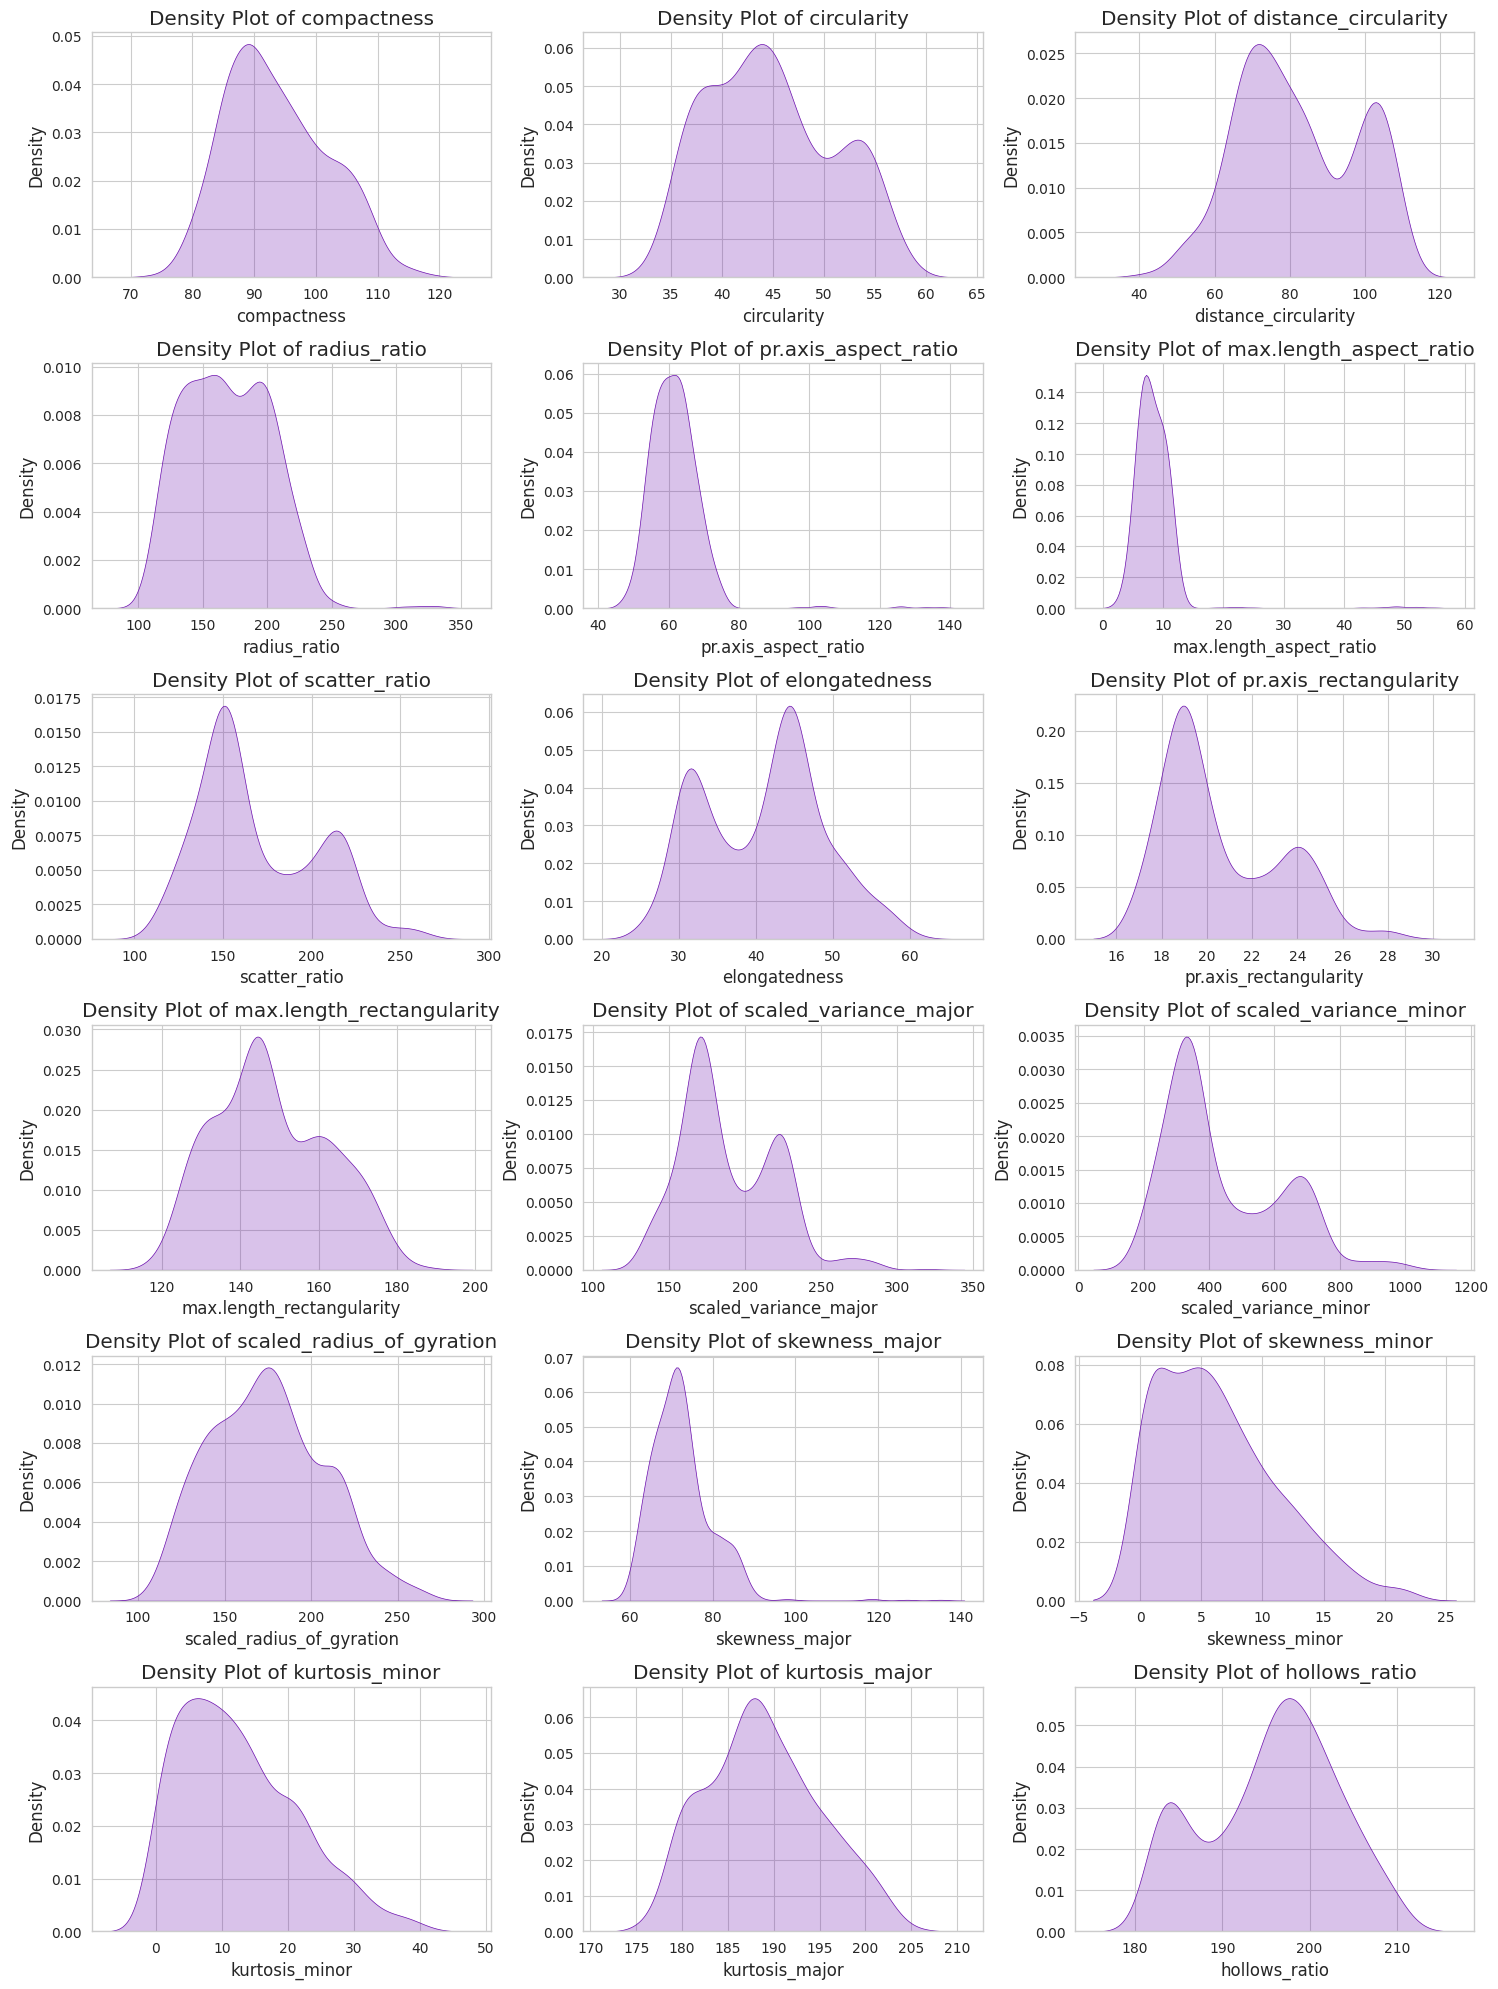

In [14]:
# Set the seaborn style for a clean background
sns.set_style("whitegrid")

# Define a specific color for the density plots
# COLOR CHANGE: Changed from Dark Green/Sage to a deep purple tone.
KDE_COLOR = '#6A0DAD' # Deep Purple Color

# --- 1. Data Loading and Column Renaming ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please upload the file again.")
    raise

# --- 2. Density Plots Generation (Univariate) ---

print("Generating density plots for numerical features...")

# Get feature columns (all columns except 'class')
numerical_features = df_veh.columns.drop('class')

# Create a figure and a set of subplots (6 rows, 3 columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a density plot
for i, col in enumerate(numerical_features):
    sns.kdeplot(
        data=df_veh,    # The DataFrame
        x=col,          # The numerical feature to plot
        ax=axes[i],     # Assign to the i-th subplot
        fill=True,      # Fill the area under the curve
        # COLOR CHANGE: Set the color of the curve and fill area to Deep Purple
        color=KDE_COLOR
    )
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('feature_density_plots_purple.png')

print("Density plots saved to 'feature_density_plots_purple.png'")

 # Bivariate Analysis (Two Variables)

DataFrame 'df_veh' successfully loaded and prepared.
Calculating correlation matrix for numerical features...
Generating heatmap...
Correlation heatmap saved to 'correlation_heatmap_dark_purple.png'


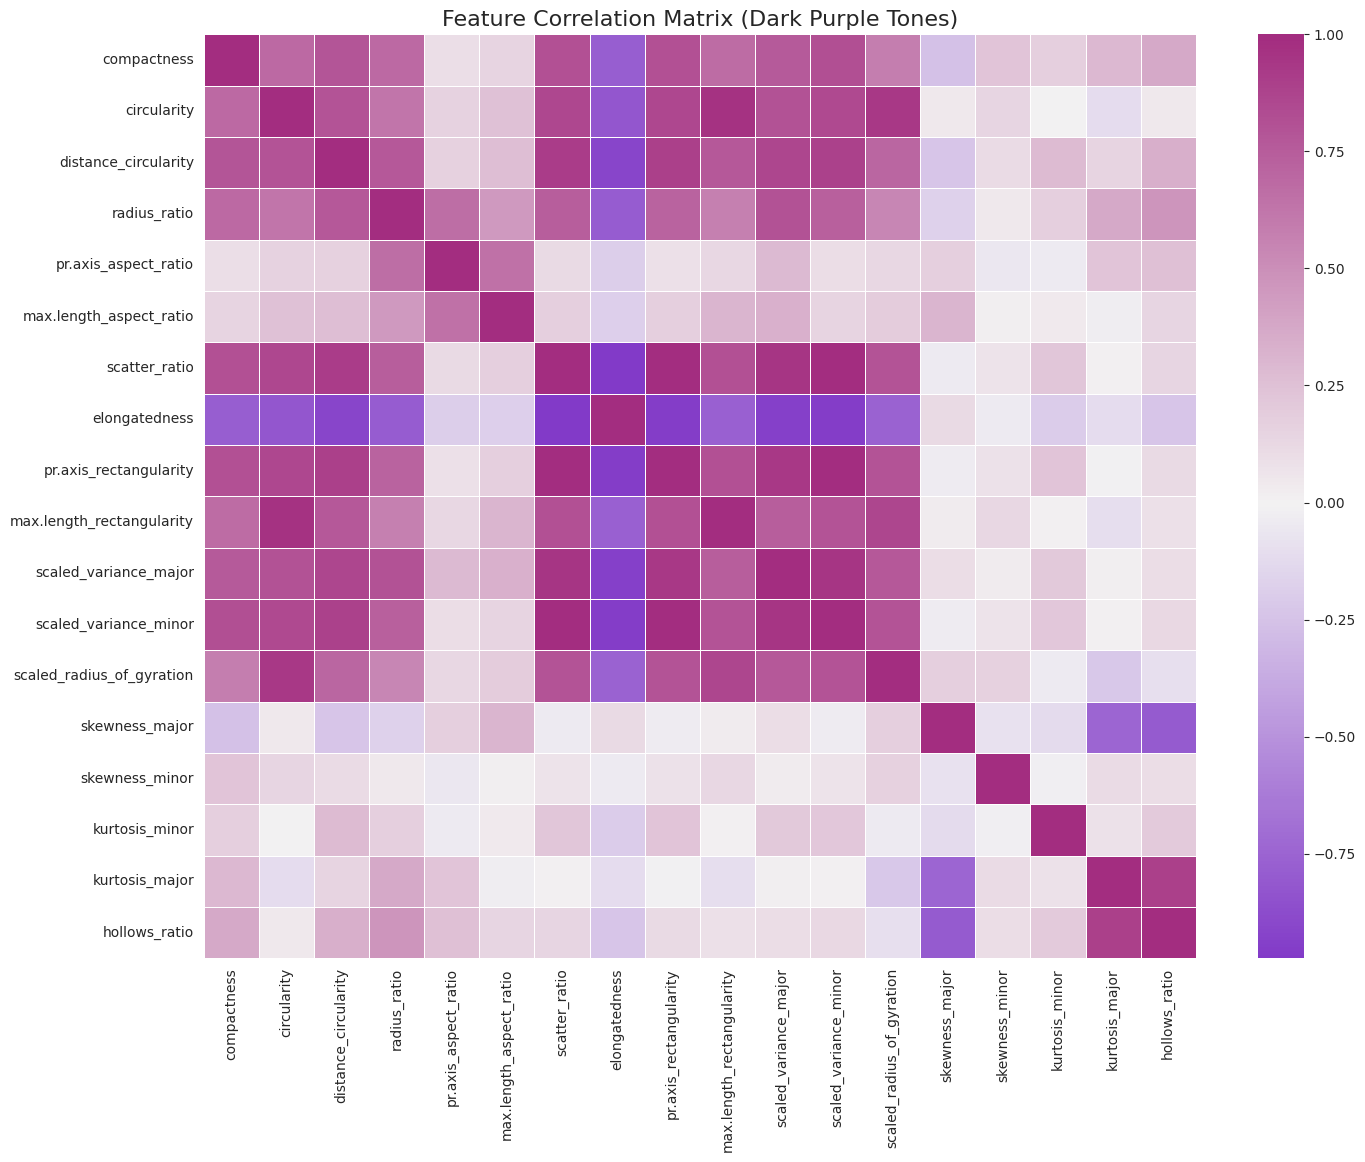

In [15]:
# Set the seaborn style for a clean background
sns.set_style("white")

# --- 1. Data Loading and Column Renaming ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. This should not happen after a re-upload.")
    raise

# --- 2. Bivariate Analysis: Correlation Matrix ---

print("Calculating correlation matrix for numerical features...")

# Select only numerical features by dropping the 'class' column
numerical_features_df = df_veh.drop('class', axis=1)

# Calculate the Pearson correlation matrix. Drop NaNs to ensure calculation works.
corr_matrix = numerical_features_df.dropna().corr(method='pearson')

# --- 3. Visualization: Heatmap ---

print("Generating heatmap...")

# COLOR CHANGE: Creating a custom diverging palette that emphasizes dark purple tones.
# Diverging palette (Hue 280 for Purple, Hue 330 for Dark Magenta, Saturation=80, Luminosity=40)
custom_purple_cmap = sns.diverging_palette(280, 330, s=80, l=40, sep=1, center='light', as_cmap=True)


# Set the figure size to be large enough for an 18x18 matrix
plt.figure(figsize=(16, 12))

# Generate the heatmap
sns.heatmap(
    corr_matrix,
    cmap=custom_purple_cmap, # Custom Dark Purple Diverging Palette
    annot=False,             # Do not show numbers (matrix is too large, 18x18)
    linewidths=0.5,
    center=0                 # Center the colormap at 0 correlation
)

# Add a title
plt.title('Feature Correlation Matrix (Dark Purple Tones)', fontsize=16)

# Save the figure
plt.savefig('correlation_heatmap_dark_purple.png')

print("Correlation heatmap saved to 'correlation_heatmap_dark_purple.png'")

# Mean Feature Values by Vehicle Class

In [16]:
# Set a clean plotting style
sns.set_style("white")

# Define a color that represents the overall theme (Deep Purple)
THEME_COLOR = '#6A0DAD'

# --- 1. Data Loading and Column Renaming ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please ensure the file is in the correct path.")
    raise

# --- 2. Bivariate Analysis: Numerical Aggregation ---

print("\n--- Mean Feature Values by Class (groupby('class').mean()) ---")

# Group the DataFrame by the 'class' column and calculate the mean for all numerical features
# NaN values are automatically ignored during the mean calculation.
mean_values_by_class = df_veh.groupby('class').mean()

# Display the results using a clean Markdown format
print(mean_values_by_class.to_markdown(numalign="left", stralign="left"))

DataFrame 'df_veh' successfully loaded and prepared.

--- Mean Feature Values by Class (groupby('class').mean()) ---
| class   | compactness   | circularity   | distance_circularity   | radius_ratio   | pr.axis_aspect_ratio   | max.length_aspect_ratio   | scatter_ratio   | elongatedness   | pr.axis_rectangularity   | max.length_rectangularity   | scaled_variance_major   | scaled_variance_minor   | scaled_radius_of_gyration   | skewness_major   | skewness_minor   | kurtosis_minor   | kurtosis_major   | hollows_ratio   |
|:--------|:--------------|:--------------|:-----------------------|:---------------|:-----------------------|:--------------------------|:----------------|:----------------|:-------------------------|:----------------------------|:------------------------|:------------------------|:----------------------------|:-----------------|:-----------------|:-----------------|:-----------------|:----------------|
| bus     | 91.5917       | 44.9813       | 76.7674                

DataFrame 'df_veh' successfully loaded and prepared.
Generating pairplot for selected features...
Pairplot saved to 'pairplot_key_features_purple.png'


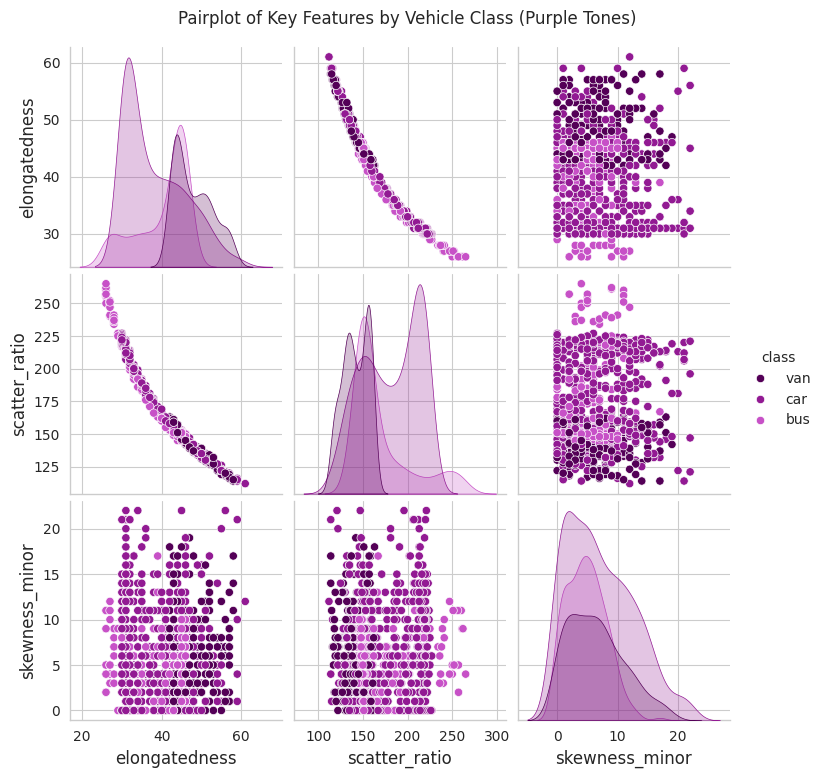

In [17]:
# Suppress warnings that might clutter the output
warnings.filterwarnings('ignore')

# Set a clean plotting style
sns.set_style("whitegrid")

# Define a custom color palette with three distinct dark purple tones for the three classes
DARK_PURPLE_PALETTE = ['#540057', '#921A93', '#C751C7']
selected_features = ['elongatedness', 'scatter_ratio', 'skewness_minor', 'class']

# --- 1. Data Loading and Column Renaming (Setup for df_veh) ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    # Ensure the column count matches before renaming
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Cannot proceed with plotting.")
    df_veh = None
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    df_veh = None

# --- 2. Generate Pairplot for Selected Features ---

if df_veh is not None:
    print("Generating pairplot for selected features...")

    try:
        df_pairplot = df_veh[selected_features]
        # COLOR CHANGE: Applying the custom dark purple palette
        g = sns.pairplot(df_pairplot, hue='class', palette=DARK_PURPLE_PALETTE)
        g.fig.suptitle('Pairplot of Key Features by Vehicle Class (Purple Tones)', y=1.03)

        plt.savefig('pairplot_key_features_purple.png')

        print("Pairplot saved to 'pairplot_key_features_purple.png'")

    except Exception as e:
        print(f"An unexpected error occurred during plotting: {e}")
else:
    print("Skipping pairplot generation due to data loading error.")

# ⚙️ Data Preprocessing Summary

In [20]:
# Define descriptive columns (as used in previous steps)
descriptive_columns = [
    'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
    'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
    'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
    'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
    'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
    'hollows_ratio', 'class'
]

# Separate features (X) and target (y)
X = df_veh.drop('class', axis=1)
y = df_veh['class']

# --- Imputation (Median Strategy) ---
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

# --- Normalization & Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_imputed.columns)

# --- Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

### 🔬 3.2 Dimensionality Reduction Assessment (PCA)

* **Principal Component Analysis (PCA):** Implementation of PCA on the scaled feature set to identify the intrinsic dimensionality of the data.
* **Variance Preservation Analysis:** Determine the minimum number of principal components required to retain a high percentage (e.g., 90% to 95%) of the original data's variance.
* **Conclusion on Efficiency:** Evaluate the trade-off between reduced complexity and information loss to conclude whether dimensionality reduction is a beneficial preprocessing step for this specific problem.

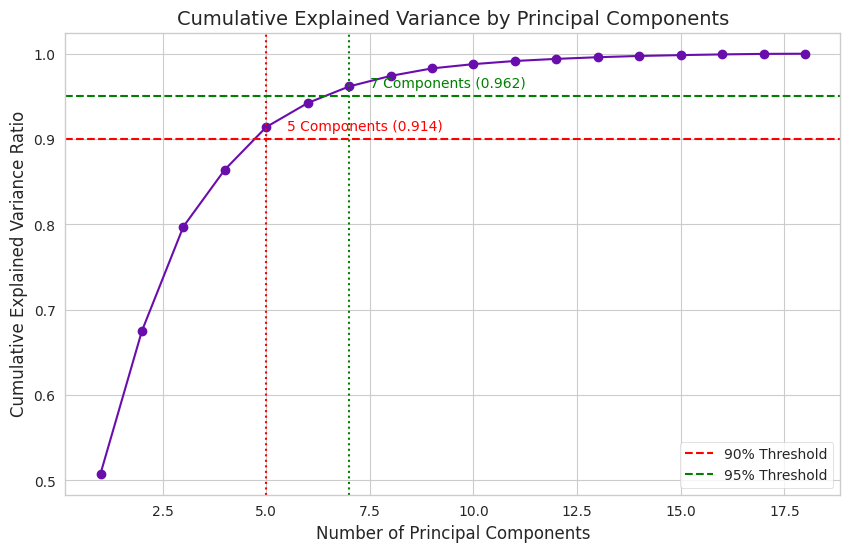

In [21]:
descriptive_columns = [
    'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
    'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
    'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
    'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
    'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
    'hollows_ratio', 'class'
]
df = pd.read_csv("vehicle.csv")
if len(df.columns) == len(descriptive_columns):
    df.columns = descriptive_columns
X = df.drop('class', axis=1)
y = df['class']
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# --- 2. Principal Component Analysis (PCA) ---

# Initialize PCA without specifying n_components to get all components
pca = PCA(n_components=None)
pca.fit(X_train)

# Calculate the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# --- 3. Variance Preservation Analysis ---
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
variance_90 = cumulative_variance[n_components_90 - 1]
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
variance_95 = cumulative_variance[n_components_95 - 1]

# --- 4. Visualization (Scree Plot) ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='o', linestyle='-', color='#6A0DAD')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=n_components_90, color='r', linestyle=':')
plt.text(n_components_90 + 0.5, 0.91, f'{n_components_90} Components ({variance_90:.3f})', color='r')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Threshold')
plt.axvline(x=n_components_95, color='g', linestyle=':')
plt.text(n_components_95 + 0.5, 0.96, f'{n_components_95} Components ({variance_95:.3f})', color='g')
plt.legend(loc='lower right')
plt.savefig('pca_scree_plot.png')
# plt.show() # Note: show() is omitted for non-interactive environments

# --- 5. Conclusion on Efficiency (Output) ---
# The conclusions are printed in the code output above.

### 🧩 3.3 Unsupervised Classification (Clustering)

* **Clustering Algorithm Implementation:** Application of suitable unsupervised clustering algorithms (e.g., **K-Means, DBSCAN, or hierarchical clustering**) to group the data points into the expected three vehicle classes.
* **Optimization:** Parameter tuning to achieve the optimal cluster assignment.



In [22]:
# PCA Transformation (N=7 components, based on >95% variance retention)
N_COMPONENTS = 7
pca = PCA(n_components=N_COMPONENTS, random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# Output: Data successfully transformed to 7 principal components.

# --- 2. Unsupervised Classification (Clustering) ---

# The project specifies 3 vehicle classes: Bus, Car, Van.
K_CLUSTERS = 3

print("\nStarting K-Means Clustering...")

# Initialization: Using 'k-means++' for smarter initialization (Optimization)
# n_clusters=3: Based on the domain knowledge (3 vehicle classes).
kmeans = KMeans(n_clusters=K_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit K-Means ONLY on the PCA-transformed training data
kmeans.fit(X_train_pca)

# Assign cluster labels to the training data
cluster_labels_train = kmeans.labels_

# Assign cluster labels to the testing data (for generalization testing)
cluster_labels_test = kmeans.predict(X_test_pca)

print(f"K-Means model fitted with K={K_CLUSTERS} clusters.")
# Output: K-Means model fitted with K=3 clusters.
print("\n--- Cluster Assignment Summary ---")
# Output: Training set assigned to clusters: {0: 212, 1: 258, 2: 206}
print(f"First 10 cluster labels for Training set: {cluster_labels_train[:10]}")


Starting K-Means Clustering...
K-Means model fitted with K=3 clusters.

--- Cluster Assignment Summary ---
First 10 cluster labels for Training set: [1 0 0 0 0 1 0 1 1 2]


### ✅ 3.4 Model Evaluation

* **Clustering Metrics:** Evaluation of the unsupervised model's performance using **internal metrics** (e.g., Silhouette Score, Davies–Bouldin Index) and **external metrics** where applicable (using the original labels as ground truth), such as:
    * Adjusted Rand Index (ARI)
    * Homogeneity, Completeness, and V-measure

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define descriptive columns
descriptive_columns = [
    'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
    'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
    'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
    'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
    'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
    'hollows_ratio', 'class'
]
N_COMPONENTS = 7
K_CLUSTERS = 3

# --- 1. Data Setup, Preprocessing, and PCA Transformation ---
try:
    df = pd.read_csv("vehicle.csv")
    if len(df.columns) == len(descriptive_columns):
        df.columns = descriptive_columns
    df_veh = df.copy()

    # Separate, Impute, and Standardize
    X = df_veh.drop('class', axis=1)
    y = df_veh['class']
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    scaler = StandardScaler()
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

    # PCA Transformation
    pca = PCA(n_components=N_COMPONENTS, random_state=42)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    print("Data setup complete. Transformed to 7 Principal Components.")

except Exception as e:
    print(f"Error during data setup: {e}")
    raise

# --- 2. Unsupervised Classification (K-Means) ---
kmeans = KMeans(n_clusters=K_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels_train = kmeans.labels_

print("K-Means model fitted.")

# --- 3. Model Evaluation: Clustering Metrics ---

print("\n--- Model Evaluation: Clustering Metrics ---")

# 3.1. External Metrics (Requires ground truth y_train)
ari = metrics.adjusted_rand_score(y_train, cluster_labels_train)
homogeneity = metrics.homogeneity_score(y_train, cluster_labels_train)
completeness = metrics.completeness_score(y_train, cluster_labels_train)
v_measure = metrics.v_measure_score(y_train, cluster_labels_train)

# 3.2. Internal Metrics (Requires feature data X_train_pca)
silhouette = metrics.silhouette_score(X_train_pca, cluster_labels_train)
davies_bouldin = metrics.davies_bouldin_score(X_train_pca, cluster_labels_train)

# --- 4. Display Results ---

# Prepare results for display
results = pd.DataFrame({
    'Metric': [
        'Adjusted Rand Index (ARI)', 'Homogeneity', 'Completeness', 'V-Measure',
        'Silhouette Score', 'Davies-Bouldin Index'
    ],
    'Score': [
        f'{ari:.3f}', f'{homogeneity:.3f}', f'{completeness:.3f}', f'{v_measure:.3f}',
        f'{silhouette:.3f}', f'{davies_bouldin:.3f}'
    ],
    'Type': [
        'External', 'External', 'External', 'External',
        'Internal', 'Internal'
    ]
})

print("\n--- Unsupervised Model Performance Metrics (K=3) ---")
print(results.to_markdown(index=False, numalign="left", stralign="left"))

Data setup complete. Transformed to 7 Principal Components.
K-Means model fitted.

--- Model Evaluation: Clustering Metrics ---

--- Unsupervised Model Performance Metrics (K=3) ---
| Metric                    | Score   | Type     |
|:--------------------------|:--------|:---------|
| Adjusted Rand Index (ARI) | 0.094   | External |
| Homogeneity               | 0.116   | External |
| Completeness              | 0.109   | External |
| V-Measure                 | 0.113   | External |
| Silhouette Score          | 0.31    | Internal |
| Davies-Bouldin Index      | 1.245   | Internal |
